# Uploading Training Data

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [12]:
path = ''
dataset_path = os.listdir( path)

label_types = os.listdir( path)
print (label_types)

['body-building', 'boxing', 'calesthenics', 'cycling', 'swimming', 'yoga']


In [13]:
rooms = []

for item in dataset_path:
 # Get all the file names
 all_rooms = os.listdir( path + '/' +item)

 # Add them to the list
 for room in all_rooms:
    rooms.append((item, str( path + '/' +item) + '/' + room))

# Build a dataframe
data = pd.DataFrame( data=rooms, columns=['tag', 'video_name'])
print(data.head())
print(data.tail())

             tag                                         video_name
0  body-building  C:/Users/aminb/Downloads/RNN/data/body-buildin...
1  body-building  C:/Users/aminb/Downloads/RNN/data/body-buildin...
2  body-building  C:/Users/aminb/Downloads/RNN/data/body-buildin...
3  body-building  C:/Users/aminb/Downloads/RNN/data/body-buildin...
4  body-building  C:/Users/aminb/Downloads/RNN/data/body-buildin...
       tag                                         video_name
1633  yoga  C:/Users/aminb/Downloads/RNN/data/yoga/Young H...
1634  yoga  C:/Users/aminb/Downloads/RNN/data/yoga/Young P...
1635  yoga  C:/Users/aminb/Downloads/RNN/data/yoga/Young W...
1636  yoga  C:/Users/aminb/Downloads/RNN/data/yoga/Young W...
1637  yoga  C:/Users/aminb/Downloads/RNN/data/yoga/Young W...


In [14]:
data = data.sample(frac=1)

<Axes: xlabel='tag', ylabel='count'>

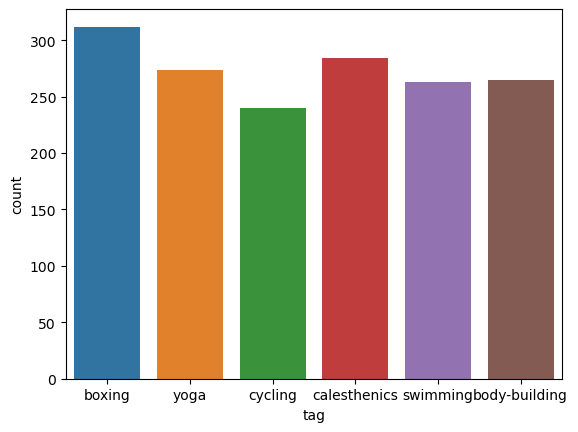

In [15]:
import seaborn as sns

sns.countplot(x=data['tag'])

# Preparing Test Data

In [16]:
df = data.sample(frac = 1)

from sklearn.model_selection import train_test_split

train_data, test_data= train_test_split( data, test_size=0.2, random_state=42)

<Axes: xlabel='tag', ylabel='count'>

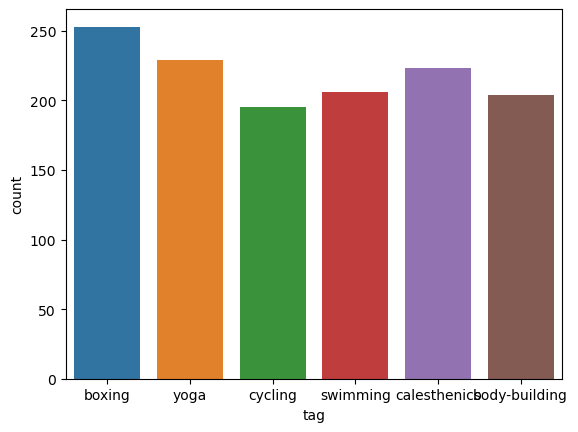

In [17]:
sns.countplot(x=train_data['tag'])


<Axes: xlabel='tag', ylabel='count'>

Error in callback <function _draw_all_if_interactive at 0x0000021980509EE0> (for post_execute):


KeyboardInterrupt: 

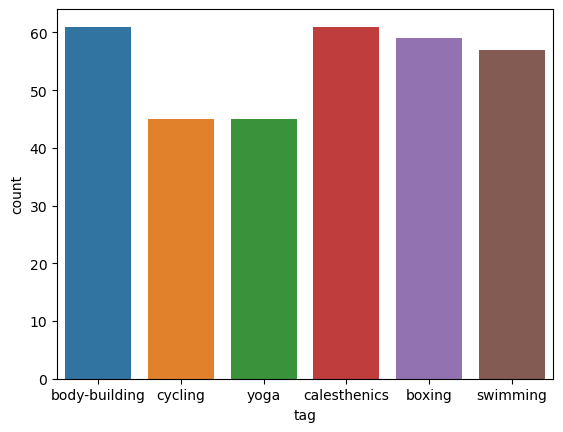

In [18]:
sns.countplot(x=test_data['tag'])

In [ ]:
#!pip install git+https://github.com/tensorflow/docs

In [ ]:
from tensorflow_docs.vis import embed
from tensorflow import keras
from imutils import paths

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as npA
import imageio
import cv2
import os

KeyboardInterrupt: 

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])
  except RuntimeError as e:
    print(e)

# Data preparation

In [ ]:
print(f"Total videos for training: {len( train_data)}")
print(f"Total videos for testing: {len(test_data)}")


train_data.sample(10)

Total videos for training: 1310
Total videos for testing: 328


,tag,video_name
428,boxing,C:/Users/aminb/Downloads/RNN/data/boxing/Punch...
568,boxing,C:/Users/aminb/Downloads/RNN/data/boxing/Shado...
464,boxing,C:/Users/aminb/Downloads/RNN/data/boxing/Shado...
795,calesthenics,C:/Users/aminb/Downloads/RNN/data/calesthenics...
716,calesthenics,C:/Users/aminb/Downloads/RNN/data/calesthenics...
691,calesthenics,C:/Users/aminb/Downloads/RNN/data/calesthenics...
1103,swimming,C:/Users/aminb/Downloads/RNN/data/swimming/25 ...
793,calesthenics,C:/Users/aminb/Downloads/RNN/data/calesthenics...
1479,yoga,C:/Users/aminb/Downloads/RNN/data/yoga/Yoga st...
129,body-building,C:/Users/aminb/Downloads/RNN/data/body-buildin...


# Preprocessing Data


In [ ]:
IMG_SIZE = 224

def crop_center_square(frame):
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]


def load_video(path, max_frames=0, resize=(IMG_SIZE, IMG_SIZE)):
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = crop_center_square(frame)
            frame = cv2.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)

            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)

* Feature Extraction

In [ ]:
from tensorflow.keras.applications import InceptionV3, VGG16
from tensorflow.keras import Input, Model

def build_feature_extractor(model_name="inception_v3"):
    if model_name == "inception_v3":
        feature_extractor = InceptionV3(
            weights="imagenet",
            include_top=False,
            pooling="avg",
            input_shape=(IMG_SIZE, IMG_SIZE, 3),
        )
        preprocess_input = keras.applications.inception_v3.preprocess_input
    elif model_name == "vgg16":
        feature_extractor = VGG16(
            weights="imagenet",
            include_top=False,
            pooling="avg",
            input_shape=(IMG_SIZE, IMG_SIZE, 3),
        )
        preprocess_input = keras.applications.vgg16.preprocess_input
    else:
        raise ValueError("Invalid model name. Supported names: 'inception_v3', 'vgg16'")

    inputs = Input((IMG_SIZE, IMG_SIZE, 3))
    preprocessed = preprocess_input(inputs)

    outputs = feature_extractor(preprocessed)
    return Model(inputs, outputs, name=f"{model_name}_feature_extractor")

# To use InceptionV3
inception_feature_extractor = build_feature_extractor(model_name="inception_v3")

# To use VGG16
vgg16_feature_extractor = build_feature_extractor(model_name="vgg16")

* Label Encoding

In [ ]:
label_processor = keras.layers.StringLookup(num_oov_indices=0, vocabulary=np.unique( train_data[ 'tag']))
print( label_processor.get_vocabulary())

labels = train_data[ 'tag'].values
labels = label_processor( labels[..., None]).numpy()
labels

['body-building', 'boxing', 'calesthenics', 'cycling', 'swimming', 'yoga']



array([[3],
       [5],
       [0],
       ...,
       [3],
       [3],
       [4]], dtype=int64)

In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 64
EPOCHS = 100

MAX_SEQ_LENGTH = 20
NUM_FEATURES = 512

In [ ]:
def prepare_all_videos(df, root_dir):
    num_samples = len(df)
    video_paths = df["video_name"].values.tolist()

    ##take all classlabels from train_df column named 'tag' and store in labels1
    labels = df["tag"].values

    #convert classlabels to label encoding
    labels = label_processor(labels[..., None]).numpy()

    # `frame_masks` and `frame_features` are what we will feed to our sequence model.
    # `frame_masks` will contain a bunch of booleans denoting if a timestep is
    # masked with padding or not.
    frame_masks = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH), dtype="bool") # 145,20
    frame_features = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32") #145,20,2048

    # For each video.
    for idx, path in enumerate(video_paths):
        print( 'Vid Num', idx)
        
        # Gather all its frames and add a batch dimension.
        frames = load_video(os.path.join(root_dir, path))
        frames = frames[None, ...]

        # Initialize placeholders to store the masks and features of the current video.
        temp_frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
        temp_frame_features = np.zeros(
            shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
        )

        # Extract features from the frames of the current video.
        for i, batch in enumerate(frames):
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            for j in range(length):
                temp_frame_features[i, j, :] = vgg16_feature_extractor.predict(
                    batch[None, j, :]
                )
            temp_frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

        frame_features[idx,] = temp_frame_features.squeeze()
        frame_masks[idx,] = temp_frame_mask.squeeze()

    return (frame_features, frame_masks), labels


X_train, y_train = prepare_all_videos( train_data, path)
X_test, y_test = prepare_all_videos( test_data, path)



Vid Num 0
1/1 [==============================] - 0s 156ms/step
Vid Num 1
1/1 [==============================] - 0s 299ms/step
Vid Num 2
1/1 [==============================] - 0s 155ms/step
Vid Num 3
1/1 [==============================] - 0s 180ms/step
Vid Num 4
1/1 [==============================] - 0s 337ms/step
Vid Num 5
1/1 [==============================] - 0s 142ms/step
Vid Num 6
1/1 [==============================] - 0s 207ms/step
Vid Num 7
1/1 [==============================] - 0s 259ms/step
Vid Num 8
1/1 [==============================] - 0s 162ms/step
Vid Num 9
1/1 [==============================] - 0s 150ms/step
Vid Num 10
1/1 [==============================] - 0s 181ms/step
Vid Num 11
1/1 [==============================] - 0s 161ms/step
Vid Num 12
1/1 [==============================] - 0s 241ms/step
Vid Num 13
1/1 [==============================] - 0s 223ms/step
Vid Num 14


KeyboardInterrupt: 

In [ ]:
np.save('train_features.npy', X_train[0])
np.save('train_masks.npy', X_train[1])
np.save('train_labels.npy', y_train)

np.save('test_features.npy', X_test[0])
np.save('test_masks.npy', X_test[1])
np.save('test_labels.npy', y_test)

In [ ]:
print(f"Frame features in train set: {X_train[0].shape}")
print(f"Frame masks in train set: {X_train[1].shape}")



print(f"train_labels in train set: { y_train.shape}")

print(f"test_labels in train set: { y_test.shape}")

# MAX_SEQ_LENGTH = 20, NUM_FEATURES = 2048. We have defined this above under hyper parameters

Frame features in train set: (1310, 20, 512)
Frame masks in train set: (1310, 20)
train_labels in train set: (1310, 1)
test_labels in train set: (328, 1)
